In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import time
import glob
import sys
import os
import gc
from sklearn.linear_model import LinearRegression

# End imports 

In [2]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)
            
                # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

In [3]:
sample_submission = "sample_submission.csv"
test = "test.csv"
train = "train.csv"

df_test = reduce_mem_usage(pd.read_csv(test))[0]
df_train = reduce_mem_usage(pd.read_csv(train))[0]
df_s_sub = reduce_mem_usage(pd.read_csv(sample_submission))[0]



Memory usage of properties dataframe is : 306.7017364501953  MB
******************************
Column:  var_0
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_2
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_3
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_5
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_6
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_7
dtype before:  float64
dtype after: 

dtype after:  float32
******************************
******************************
Column:  var_68
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_69
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_70
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_71
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_72
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_73
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_74
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_75
dtype before:  float64
dtype after:  fl

dtype after:  float32
******************************
******************************
Column:  var_135
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_136
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_137
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_138
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_139
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_140
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_141
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_142
dtype before:  float64
dtype af

Memory usage of properties dataframe is : 308.2276153564453  MB
******************************
Column:  target
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  var_0
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_1
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_2
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_3
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_4
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_5
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_6
dtype before:  float64
dtype after:  fl

dtype after:  float32
******************************
******************************
Column:  var_67
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_68
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_69
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_70
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_71
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_72
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_73
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_74
dtype before:  float64
dtype after:  fl

dtype after:  float32
******************************
******************************
Column:  var_136
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_137
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_138
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_139
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_140
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_141
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_142
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  var_143
dtype before:  float64
dtype af

In [4]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.267500,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.711200,2.4669,4.3654,10.7200,15.472200,-8.719700
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.631599,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.576500,0.4773,-1.4852,9.8714,19.129299,-20.976000
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.253700,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.981300,2.1281,-7.1086,7.0618,19.895599,-23.179399
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.566000,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.187400,3.1656,3.9567,9.2295,13.016800,-4.210800
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.604800,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.554199,-0.2860,-5.1612,7.2882,13.926000,-9.184600


In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


In [6]:
df_s_sub.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [7]:
feature_names = df_train.columns
feature_names

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [8]:
df_train[df_train["target"]==1]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.369900,1.5934,16.739500,7.3330,12.1450,5.900400,4.8222,20.972900,...,7.400200,7.4031,4.3989,4.0978,17.363800,-1.3022,9.6846,9.0419,15.606400,-10.8529
29,train_29,1,5.330100,-2.6064,13.191300,3.1193,6.6483,-6.565900,5.9064,15.234100,...,5.921500,7.9676,2.3405,1.1482,23.216801,-2.0105,3.7600,9.4513,17.410500,-14.6897
63,train_63,1,7.707200,0.0183,9.997400,8.3524,9.2886,-13.362700,6.0425,10.110800,...,1.583200,5.0039,3.8814,7.4241,21.484400,-0.8297,-3.0468,7.5790,15.768500,5.4769
65,train_65,1,10.535800,-2.5439,8.739400,6.7548,14.4099,-3.872400,5.1584,15.838100,...,4.664800,6.4227,3.4025,-4.0882,14.117400,-0.2472,5.3847,8.6949,15.134000,3.8449
71,train_71,1,6.754700,2.5973,14.214100,8.3514,7.4942,-1.305500,4.2336,15.024300,...,1.467700,3.5935,2.0013,1.5777,18.282000,-4.3408,6.8869,9.3567,18.901300,13.3447
72,train_72,1,8.647000,0.4462,10.980800,10.1859,13.9121,-16.464500,5.2837,13.839600,...,6.600400,13.0969,2.2437,0.6260,23.457199,0.3117,8.1634,7.9248,10.546200,-17.8708
84,train_84,1,14.682500,6.7583,9.776600,9.9461,7.9207,-2.717400,5.4594,20.157900,...,4.338800,10.4738,2.3715,1.5612,18.848801,-1.2723,8.7246,7.7010,15.286100,9.8048
99,train_99,1,9.455400,-3.5377,8.102600,7.4557,12.8716,4.452600,4.1798,19.048000,...,11.464200,9.4043,2.4608,5.1603,21.948299,-0.9451,-5.9209,9.7453,16.313801,-14.8816
119,train_119,1,12.676900,-0.4517,6.737100,9.4245,12.7274,3.058500,5.7957,15.579700,...,1.687700,9.6047,0.7896,10.2968,20.051300,-0.9380,10.2037,7.7482,13.291700,-11.2830
120,train_120,1,7.638200,-6.3480,8.314500,7.6210,10.6435,-8.802500,7.1044,20.676100,...,-1.658500,13.7319,0.8665,10.6605,24.483500,0.1339,-4.0743,7.8159,19.445801,-19.9356


In [9]:
y = df_train['target']
x = df_train.loc[:, df_train.columns != 'ID_code']
x = x.loc[:, x.columns != 'target']

In [10]:
lr = LinearRegression(normalize=True, n_jobs=50)
lr.fit(x, y)
lr.score(x, y)

0.1817377802286757

In [11]:
test = df_test.loc[:, df_test.columns != 'ID_code']

print(lr.predict(test))

[ 0.22534084  0.2535553   0.11162901 ... -0.13844538  0.11886549
  0.20386362]


In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=100)
kf.get_n_splits(x)

100

In [13]:
print(kf)

KFold(n_splits=100, random_state=None, shuffle=False)


In [14]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "Test: ", test_index)

TRAIN: [  2000   2001   2002 ... 199997 199998 199999] Test:  [   0    1    2 ... 1997 1998 1999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [2000 2001 2002 ... 3997 3998 3999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [4000 4001 4002 ... 5997 5998 5999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [6000 6001 6002 ... 7997 7998 7999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [8000 8001 8002 ... 9997 9998 9999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [10000 10001 10002 ... 11997 11998 11999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [12000 12001 12002 ... 13997 13998 13999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [14000 14001 14002 ... 15997 15998 15999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [16000 16001 16002 ... 17997 17998 17999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [18000 18001 18002 ... 19997 199

TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [158000 158001 158002 ... 159997 159998 159999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [160000 160001 160002 ... 161997 161998 161999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [162000 162001 162002 ... 163997 163998 163999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [164000 164001 164002 ... 165997 165998 165999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [166000 166001 166002 ... 167997 167998 167999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [168000 168001 168002 ... 169997 169998 169999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [170000 170001 170002 ... 171997 171998 171999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [172000 172001 172002 ... 173997 173998 173999]
TRAIN: [     0      1      2 ... 199997 199998 199999] Test:  [174000 174001 174002 ... 175997 175998 175999]
TRAIN: [  

In [15]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve

In [26]:
target = df_train['target']
features = [c for c in df_train.columns if c not in ['ID_code', 'target']]
folds = StratifiedKFold(n_splits=30, shuffle = False, random_state=22000)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))

model_array = []

param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.38,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.045,
    'learning_rate': 0.0095,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 16,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}
num_round = 1000000

for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3500)
    print("Model:", clf)
    model_array.append(clf)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits
    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))


predictions

Fold 0
Training until validation scores don't improve for 3500 rounds.
[1000]	training's auc: 0.898978	valid_1's auc: 0.875716
[2000]	training's auc: 0.909981	valid_1's auc: 0.881619
[3000]	training's auc: 0.917	valid_1's auc: 0.88506
[4000]	training's auc: 0.922282	valid_1's auc: 0.887243
[5000]	training's auc: 0.926684	valid_1's auc: 0.88879
[6000]	training's auc: 0.930555	valid_1's auc: 0.889817
[7000]	training's auc: 0.934094	valid_1's auc: 0.890526
[8000]	training's auc: 0.937438	valid_1's auc: 0.891043
[9000]	training's auc: 0.940711	valid_1's auc: 0.891589
[10000]	training's auc: 0.943784	valid_1's auc: 0.891732
[11000]	training's auc: 0.946701	valid_1's auc: 0.891813
[12000]	training's auc: 0.949575	valid_1's auc: 0.89212
[13000]	training's auc: 0.952327	valid_1's auc: 0.892225
[14000]	training's auc: 0.954957	valid_1's auc: 0.89221
[15000]	training's auc: 0.957488	valid_1's auc: 0.892043
[16000]	training's auc: 0.959964	valid_1's auc: 0.891999
[17000]	training's auc: 0.962309	

[19000]	training's auc: 0.966909	valid_1's auc: 0.892061
[20000]	training's auc: 0.968982	valid_1's auc: 0.89202
Early stopping, best iteration is:
[16917]	training's auc: 0.962286	valid_1's auc: 0.892234
Model: <lightgbm.basic.Booster object at 0x000001D8B06187B8>
CV score: 0.52829 
Fold 8
Training until validation scores don't improve for 3500 rounds.
[1000]	training's auc: 0.898957	valid_1's auc: 0.889694
[2000]	training's auc: 0.909606	valid_1's auc: 0.897201
[3000]	training's auc: 0.916623	valid_1's auc: 0.901784
[4000]	training's auc: 0.921946	valid_1's auc: 0.904159
[5000]	training's auc: 0.926455	valid_1's auc: 0.905445
[6000]	training's auc: 0.930314	valid_1's auc: 0.906533
[7000]	training's auc: 0.933992	valid_1's auc: 0.906889
[8000]	training's auc: 0.937335	valid_1's auc: 0.907074
[9000]	training's auc: 0.940519	valid_1's auc: 0.907188
[10000]	training's auc: 0.943615	valid_1's auc: 0.90714
[11000]	training's auc: 0.946593	valid_1's auc: 0.90708
Early stopping, best iterati

[7000]	training's auc: 0.934172	valid_1's auc: 0.898366
[8000]	training's auc: 0.937489	valid_1's auc: 0.898309
[9000]	training's auc: 0.940711	valid_1's auc: 0.898492
[10000]	training's auc: 0.943827	valid_1's auc: 0.898675
[11000]	training's auc: 0.946735	valid_1's auc: 0.89853
[12000]	training's auc: 0.949577	valid_1's auc: 0.8987
[13000]	training's auc: 0.952332	valid_1's auc: 0.89838
[14000]	training's auc: 0.955041	valid_1's auc: 0.898394
[15000]	training's auc: 0.957562	valid_1's auc: 0.898623
Early stopping, best iteration is:
[11928]	training's auc: 0.949371	valid_1's auc: 0.898763
Model: <lightgbm.basic.Booster object at 0x000001D8B48F5CF8>
CV score: 0.62829 
Fold 17
Training until validation scores don't improve for 3500 rounds.
[1000]	training's auc: 0.899068	valid_1's auc: 0.89159
[2000]	training's auc: 0.909652	valid_1's auc: 0.899632
[3000]	training's auc: 0.916611	valid_1's auc: 0.903837
[4000]	training's auc: 0.921959	valid_1's auc: 0.906133
[5000]	training's auc: 0.92

Model: <lightgbm.basic.Booster object at 0x000001D8B48F5470>
CV score: 0.77806 
Fold 25
Training until validation scores don't improve for 3500 rounds.
[1000]	training's auc: 0.899353	valid_1's auc: 0.885657
[2000]	training's auc: 0.909743	valid_1's auc: 0.893557
[3000]	training's auc: 0.916668	valid_1's auc: 0.897891
[4000]	training's auc: 0.922039	valid_1's auc: 0.900185
[5000]	training's auc: 0.926477	valid_1's auc: 0.901788
[6000]	training's auc: 0.930433	valid_1's auc: 0.90243
[7000]	training's auc: 0.93404	valid_1's auc: 0.903092
[8000]	training's auc: 0.937419	valid_1's auc: 0.903569
[9000]	training's auc: 0.940574	valid_1's auc: 0.903956
[10000]	training's auc: 0.943713	valid_1's auc: 0.904012
[11000]	training's auc: 0.946685	valid_1's auc: 0.903806
[12000]	training's auc: 0.94953	valid_1's auc: 0.903592
Early stopping, best iteration is:
[8790]	training's auc: 0.939933	valid_1's auc: 0.904093
Model: <lightgbm.basic.Booster object at 0x000001D8B48F5278>
CV score: 0.80085 
Fold 

array([0.09651114, 0.2090172 , 0.17353917, ..., 0.00467994, 0.10076892,
       0.06425775])

In [27]:
print(oof)
print(predictions)

[0.00765982 0.43274849 0.00527941 ... 0.06974595 0.05570893 0.00499313]
[0.09651114 0.2090172  0.17353917 ... 0.00467994 0.10076892 0.06425775]


In [28]:
print(model_array)

[<lightgbm.basic.Booster object at 0x000001D8B5D70F98>, <lightgbm.basic.Booster object at 0x000001D8B5D70EF0>, <lightgbm.basic.Booster object at 0x000001D8B5D70E48>, <lightgbm.basic.Booster object at 0x000001D8B5D70F28>, <lightgbm.basic.Booster object at 0x000001D8B5D70C88>, <lightgbm.basic.Booster object at 0x000001D8B0618550>, <lightgbm.basic.Booster object at 0x000001D8B0618668>, <lightgbm.basic.Booster object at 0x000001D8B06187B8>, <lightgbm.basic.Booster object at 0x000001D8B0618780>, <lightgbm.basic.Booster object at 0x000001D8B06186A0>, <lightgbm.basic.Booster object at 0x000001D8B48F5128>, <lightgbm.basic.Booster object at 0x000001D8B5D70E80>, <lightgbm.basic.Booster object at 0x000001D8B48F57B8>, <lightgbm.basic.Booster object at 0x000001D8B48F54A8>, <lightgbm.basic.Booster object at 0x000001D8B48F5AC8>, <lightgbm.basic.Booster object at 0x000001D8B48F58D0>, <lightgbm.basic.Booster object at 0x000001D8B48F5CF8>, <lightgbm.basic.Booster object at 0x000001D8B48F5080>, <lightgbm

In [30]:
print(type(model_array[0]))

<class 'lightgbm.basic.Booster'>


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


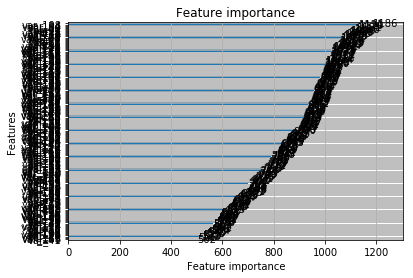

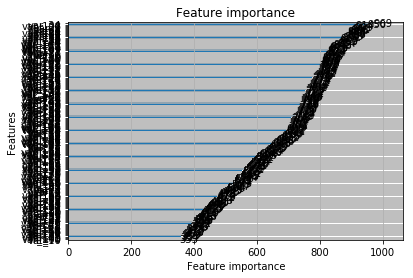

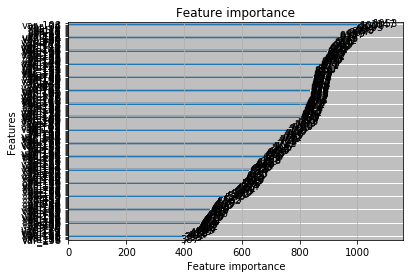

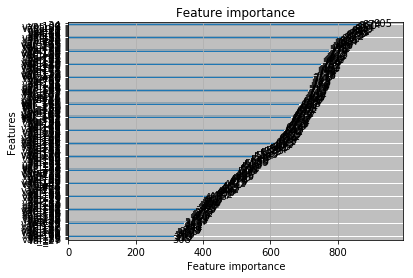

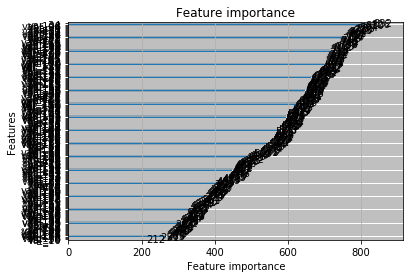

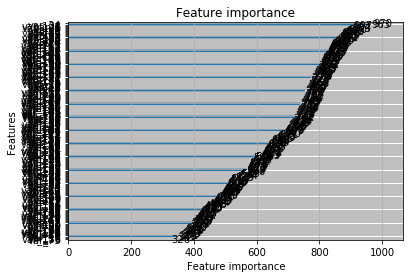

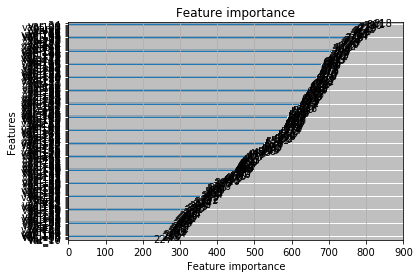

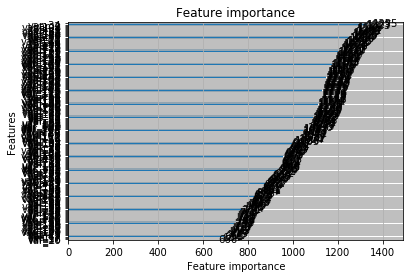

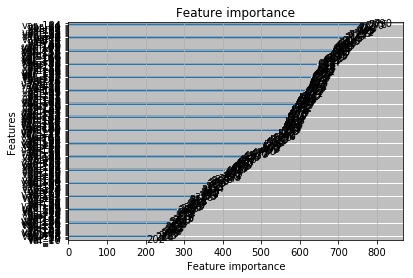

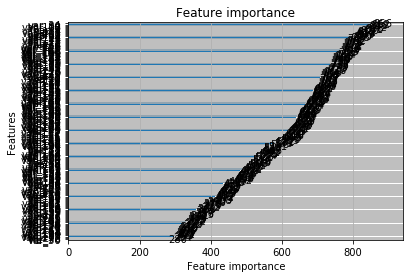

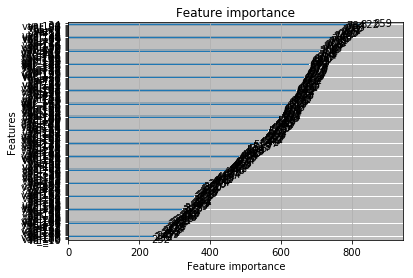

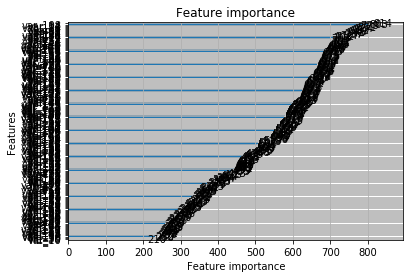

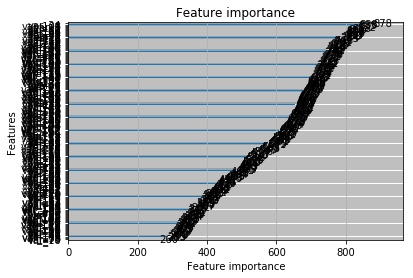

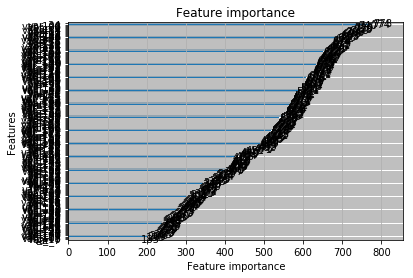

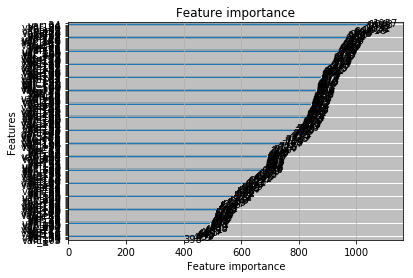

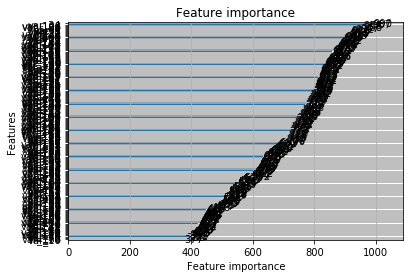

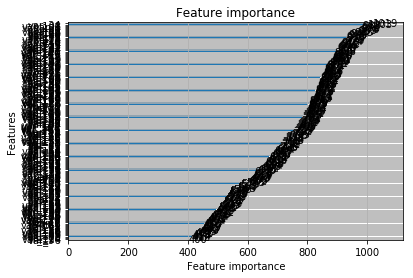

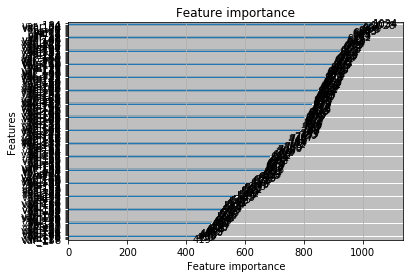

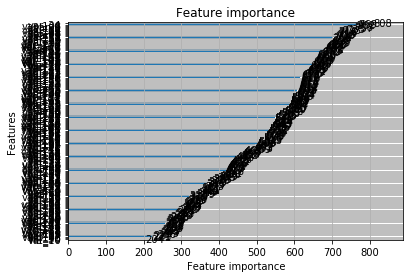

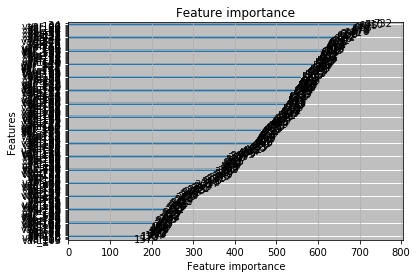

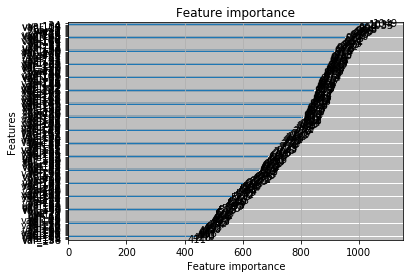

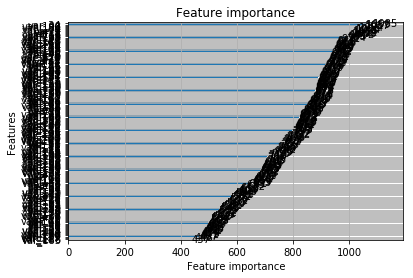

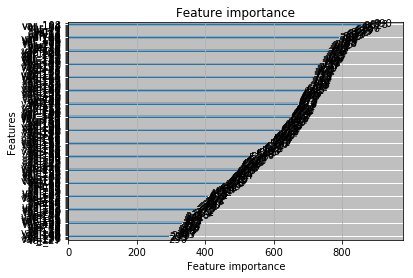

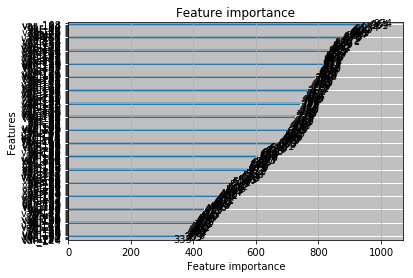

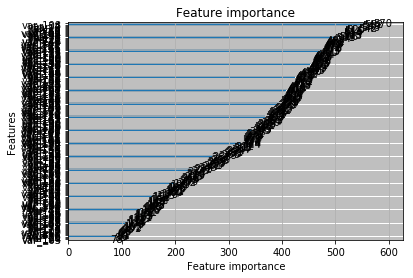

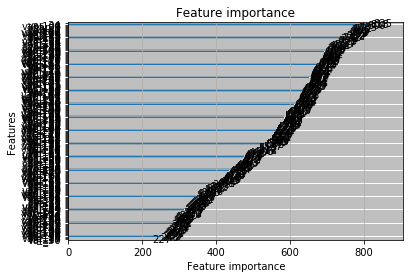

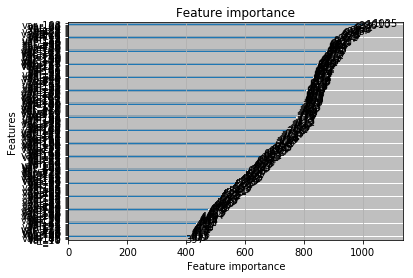

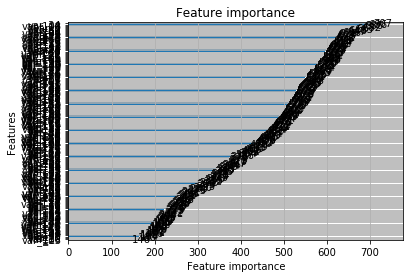

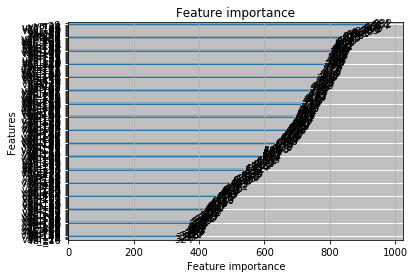

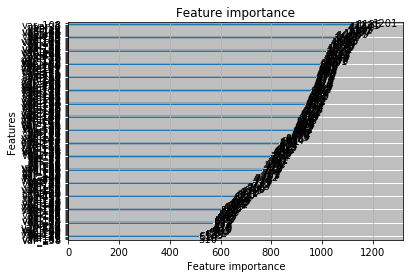

In [32]:
for model in model_array:
    lgb.plot_importance(model)